In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import filters
from scipy import signal
import skimage.io as io

## Process of Harris Corner Detection Algorithm
1. Color to grayscale
2. Spatial derivative calculation
3. Structure tensor setup
4. Harris response calculation
5. Non-maximum suppression

### 1. Color to grayscale

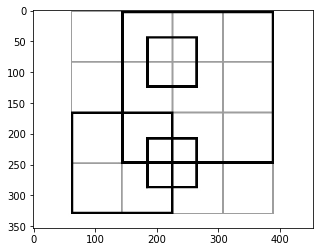

In [2]:
#If we use Harris corner detector in a color image, 
#the first step is to convert it into a grayscale image, which will enhance the processing speed.
# Load image:
input_pixels = imread('resources/box.jpg')
input_pixels = np.array(rgb2gray(input_pixels)*255, np.uint8)
# io.imsave('testl.jpg', input_pixels)
plt.imshow(input_pixels, cmap="gray")

### 2. Spatial derivative calculation

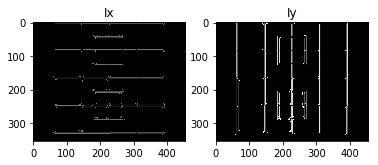

In [3]:
#Spatial derivative calculation

# using np.diff
# Ix = np.diff(input_pixels, axis=1)
# Iy = np.diff(input_pixels, axis=0)
# OR
# using Sobel derivative filters
# 
# Ix = np.zeros(input_pixels.shape)
# filters.sobel(input_pixels,1,Ix)
# Iy = np.zeros(input_pixels.shape)
# filters.sobel(input_pixels,0,Iy)
Ix, Iy = np.gradient(input_pixels)

plt.subplot(121)
plt.title("Ix")
plt.imshow(Ix, cmap="gray")
plt.subplot(122)
plt.title("Iy")
plt.imshow(Iy, cmap="gray")

### 3. Structure tensor setup

In [6]:
Ixx = Ix**2
Iyy = Iy**2
Ixy = Ix*Iy

M = [[Ixx , Ixy],[Ixy, Iyy]]

### 4. Harris response calculation

In [8]:
# Sensitivity factor to separate corners from edges, typically in range `[0, 0.2]`. 
# Small values of k result in detection of sharp corners.
k = 0.05

# determinant
det = Ixx * Iyy - Ixy ** 2
# trace
trace = Ixx + Iyy

response = det - k * trace ** 2

print response

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


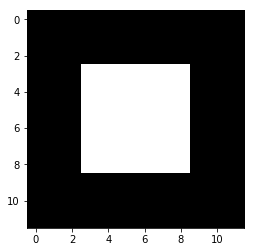

In [10]:
#random sample image
ximage = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

plt.imshow(ximage, cmap="gray")

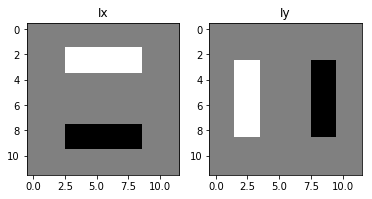

In [17]:
def plotIxIy(Ix, Iy):
    plt.subplot(121)
    plt.title("Ix")
    plt.imshow(Ix, cmap="gray")
    plt.subplot(122)
    plt.title("Iy")
    plt.imshow(Iy, cmap="gray")   
    
Ix, Iy = np.gradient(ximage)
plotIxIy(Ix, Iy)

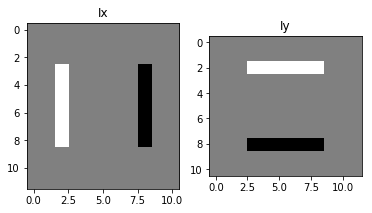

In [19]:
Ix = np.diff(ximage, axis=1)
Iy = np.diff(ximage, axis=0)
plotIxIy(Ix, Iy)

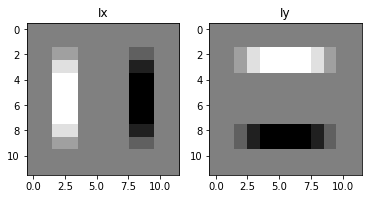

In [22]:
Ix = np.zeros(ximage.shape)
filters.sobel(ximage,1,Ix)
Iy = np.zeros(ximage.shape)
filters.sobel(ximage,0,Iy)
plotIxIy(Ix, Iy)

In [23]:
Ixx = Ix**2
Iyy = Iy**2
Ixy = Ix*Iy

# Sensitivity factor to separate corners from edges, typically in range `[0, 0.2]`. 
# Small values of k result in detection of sharp corners.
k = 0.05

# determinant
det = Ixx * Iyy - Ixy ** 2
# trace
trace = Ixx + Iyy

response = det - k * trace ** 2

print response

[[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.   -0.2  -5.  -12.8 -12.8 -12.8 -12.8  -5.   -0.2   0.    0. ]
 [  0.    0.   -5.  -16.2 -12.8 -12.8 -12.8 -12.8 -16.2  -5.    0.    0. ]
 [  0.    0.  -12.8 -12.8   0.    0.    0.    0.  -12.8 -12.8   0.    0. ]
 [  0.    0.  -12.8 -12.8   0.    0.    0.    0.  -12.8 -12.8   0.    0. ]
 [  0.    0.  -12.8 -12.8   0.    0.    0.    0.  -12.8 -12.8   0.    0. ]
 [  0.    0.  -12.8 -12.8   0.    0.    0.    0.  -12.8 -12.8   0.    0. ]
 [  0.    0.   -5.  -16.2 -12.8 -12.8 -12.8 -12.8 -16.2  -5.    0.    0. ]
 [  0.    0.   -0.2  -5.  -12.8 -12.8 -12.8 -12.8  -5.   -0.2   0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]]


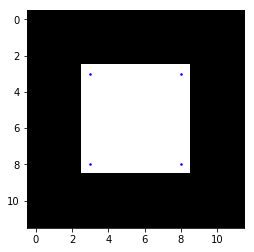

In [31]:
from skimage.feature import corner_harris, corner_peaks
# print corner_harris(ximage)
coords = corner_peaks(corner_harris(ximage))

fig, ax = plt.subplots()
ax.imshow(ximage, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)

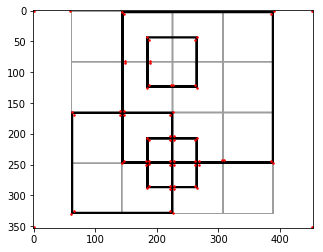

In [33]:
input_pixels = imread('resources/box.jpg')
input_pixels = np.array(rgb2gray(input_pixels)*255, np.uint8)
coords = corner_peaks(corner_harris(input_pixels))

fig, ax = plt.subplots()
ax.imshow(input_pixels, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=3)

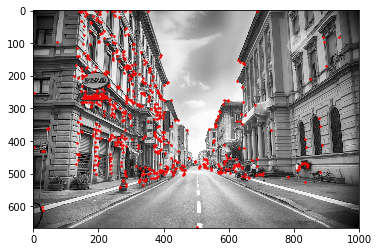

In [34]:
input_pixels = imread('resources/city.jpg')
input_pixels = np.array(rgb2gray(input_pixels)*255, np.uint8)
coords = corner_peaks(corner_harris(input_pixels))

fig, ax = plt.subplots()
ax.imshow(input_pixels, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=3)

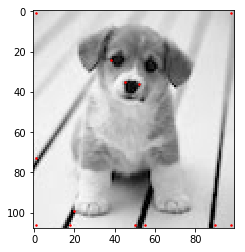

In [35]:
input_pixels = imread('resources/puppy.jpg')
input_pixels = np.array(rgb2gray(input_pixels)*255, np.uint8)
coords = corner_peaks(corner_harris(input_pixels))

fig, ax = plt.subplots()
ax.imshow(input_pixels, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=3)

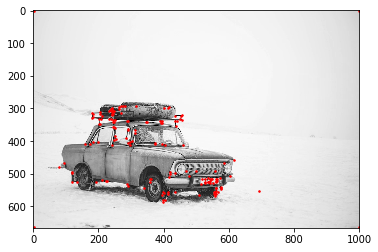

In [36]:
input_pixels = imread('resources/auto.jpg')
input_pixels = np.array(rgb2gray(input_pixels)*255, np.uint8)
coords = corner_peaks(corner_harris(input_pixels))

fig, ax = plt.subplots()
ax.imshow(input_pixels, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=3)